## Práctica 2 usando datos

Práctica 2 usando una base de datos Kaggle de Colombia.

El conjunto de datos a utilizar es una recopilación sobre la violencia intrafamiliar que se ha desarrollado en Colombia a lo largo del tiempo. Los datos contienen datos que refieren la ubicación, las fechas de los sucesos, el género de la víctima, el grupo etario, la cantidad y las armas que fueron utilizadas.

In [1]:
# Importando librerias

%matplotlib inline
# Añadir los gráficos en el cuaderno, se usa dentro de los cuadernos jupyter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import iqr

In [2]:
# Importando la información 

df = pd.read_csv("Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv")

/home/oscar/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info() # imprime columnas, tipo de variable, entre otras.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [4]:
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [5]:
# tabla de frecuencias grupo etario

df["GRUPO ETARIO"].value_counts()

ADULTOS         420237
ADOLESCENTES     28396
MENORES          26448
NO REPORTA         274
Name: GRUPO ETARIO, dtype: int64

In [6]:
dx = df.groupby("GENERO")["GRUPO ETARIO"].value_counts()

dx

GENERO      GRUPO ETARIO
FEMENINO    ADULTOS         333230
            ADOLESCENTES     19991
            MENORES          12684
MASCULINO   ADULTOS          86989
            MENORES          13762
            ADOLESCENTES      8405
NO REPORTA  NO REPORTA         274
            ADULTOS             18
            MENORES              2
Name: GRUPO ETARIO, dtype: int64

<AxesSubplot:xlabel='GENERO', ylabel='count'>

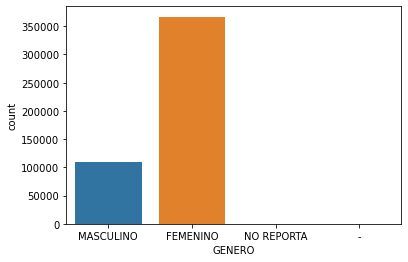

In [7]:
sns.countplot(x=df.GENERO.dropna())

<AxesSubplot:xlabel='GENERO', ylabel='CANTIDAD'>

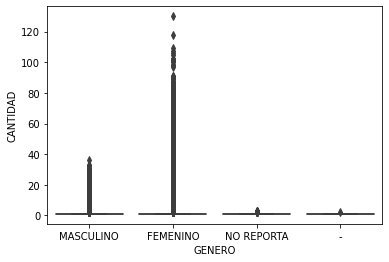

In [8]:
sns.boxplot(x=df.GENERO, y=df.CANTIDAD)

In [9]:
dx = df.loc[(df["MUNICIPIO"] == "BOGOTÁ D.C. (CT)")]

dx = df.groupby(["ARMAS MEDIOS","GRUPO ETARIO"])["CANTIDAD"]

dx.value_counts()

ARMAS MEDIOS                 GRUPO ETARIO  CANTIDAD
-                            ADULTOS       1               1
ARMA BLANCA / CORTOPUNZANTE  ADOLESCENTES  1            1753
                                           2              55
                                           3               3
                             ADULTOS       1           31294
                                                       ...  
SIN EMPLEO DE ARMAS          MENORES       15              2
                                           13              1
                             NO REPORTA    1              36
                                           2               4
                                           3               3
Name: CANTIDAD, Length: 414, dtype: int64

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEPARTAMENTO', ylabel='count'>

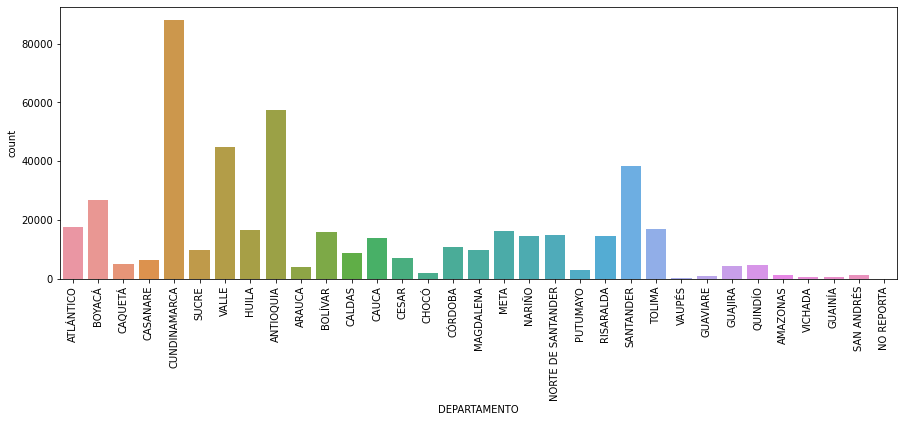

In [10]:
dx = df.loc[:,["DEPARTAMENTO", "GENERO", "CANTIDAD"]]
plt.figure(figsize= (15,5))
plt.xticks(rotation=90)

sns.countplot(dx.DEPARTAMENTO)

<Figure size 1080x360 with 0 Axes>

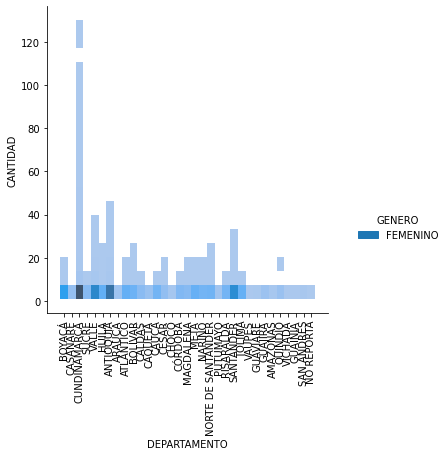

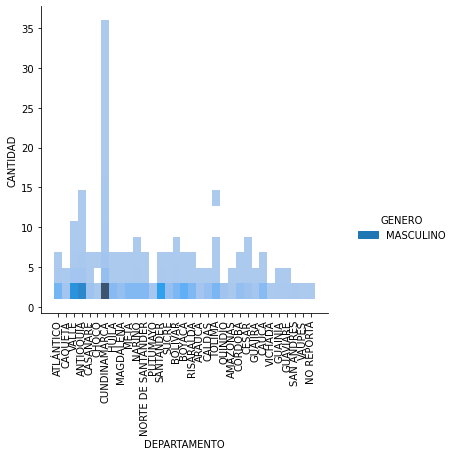

In [11]:
dx = df.loc[(df.GENERO == "FEMENINO")]
dm = df.loc[(df.GENERO == "MASCULINO")]
plt.figure(figsize=(15,5))
sns.displot(data=dx, y=dx.CANTIDAD, hue="GENERO", x=dx.DEPARTAMENTO)
plt.xticks(rotation=90)

sns.displot(data=dm,y=dm.CANTIDAD,hue="GENERO",x=dm.DEPARTAMENTO)
plt.xticks(rotation=90)

plt.show()

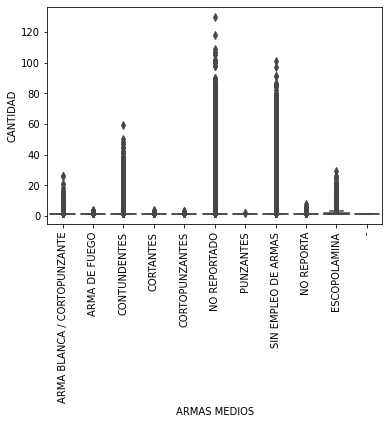

In [12]:
sns.boxplot( y=df.CANTIDAD, x=df["ARMAS MEDIOS"],data=df)
plt.xticks(rotation=90)
plt.show()



/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ARMA BLANCA / CORTOPUNZANTE'),
  Text(1, 0, 'ARMA DE FUEGO'),
  Text(2, 0, 'CONTUNDENTES'),
  Text(3, 0, 'CORTANTES'),
  Text(4, 0, 'CORTOPUNZANTES'),
  Text(5, 0, 'NO REPORTADO'),
  Text(6, 0, 'PUNZANTES'),
  Text(7, 0, 'SIN EMPLEO DE ARMAS'),
  Text(8, 0, 'NO REPORTA'),
  Text(9, 0, 'ESCOPOLAMINA'),
  Text(10, 0, '-')])

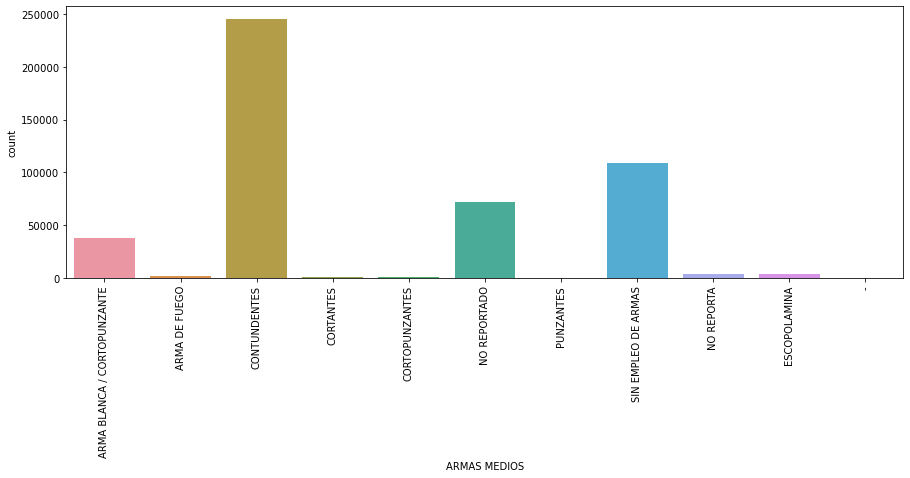

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(df["ARMAS MEDIOS"])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='CANTIDAD', ylabel='GENERO'>

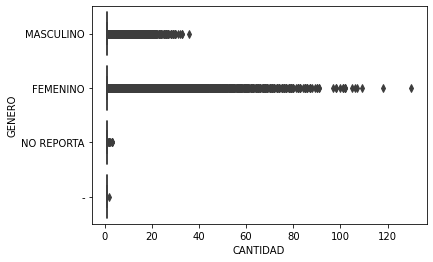

In [14]:
sns.boxplot(x=df.CANTIDAD, y=df.GENERO)

In [15]:

df.DEPARTAMENTO.value_counts()


CUNDINAMARCA          88100
ANTIOQUIA             57288
VALLE                 44909
SANTANDER             38493
BOYACÁ                26920
ATLÁNTICO             17516
TOLIMA                17007
HUILA                 16547
META                  16223
BOLÍVAR               15954
NORTE DE SANTANDER    14919
RISARALDA             14381
NARIÑO                14373
CAUCA                 13947
CÓRDOBA               10800
SUCRE                  9745
MAGDALENA              9691
CALDAS                 8742
CESAR                  7109
CASANARE               6418
CAQUETÁ                4857
QUINDÍO                4800
GUAJIRA                4434
ARAUCA                 3852
PUTUMAYO               3104
CHOCÓ                  2071
AMAZONAS               1408
SAN ANDRÉS             1155
GUAVIARE                886
GUAINÍA                 518
VICHADA                 424
VAUPÉS                  373
NO REPORTA                6
Name: DEPARTAMENTO, dtype: int64

In [16]:
x = df.groupby(["ARMAS MEDIOS"])["GENERO"].value_counts()
x

ARMAS MEDIOS                 GENERO    
-                            FEMENINO           1
ARMA BLANCA / CORTOPUNZANTE  FEMENINO       27409
                             MASCULINO      10648
                             NO REPORTA        12
                             -                  1
ARMA DE FUEGO                FEMENINO        1964
                             MASCULINO        359
CONTUNDENTES                 FEMENINO      191434
                             MASCULINO      53387
                             NO REPORTA       121
                             -                  3
CORTANTES                    FEMENINO         839
                             MASCULINO        298
                             NO REPORTA         1
CORTOPUNZANTES               FEMENINO         886
                             MASCULINO        279
                             NO REPORTA         2
ESCOPOLAMINA                 FEMENINO        2984
                             MASCULINO        877
          

In [17]:
df.CANTIDAD.describe()

count    476970.000000
mean          1.707764
std           3.338647
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         130.000000
Name: CANTIDAD, dtype: float64

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CANTIDAD'>

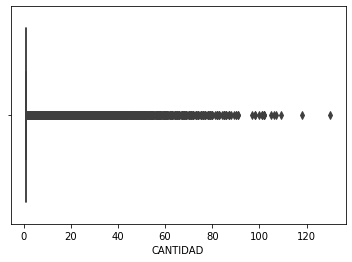

In [18]:
sns.boxplot(df.CANTIDAD)

In [19]:
np.mean(df.CANTIDAD)


1.7077635910015305

In [20]:
df.CANTIDAD.max()

130

In [21]:
dx = df.loc[(df.CANTIDAD == 130)]
dx.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
333317,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,NO REPORTADO,1/09/2019,FEMENINO,ADULTOS,130


In [22]:
dx = df.loc[(df.CANTIDAD > 20)]
dx.head()


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
39,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,22
94,VALLE,CALI (CT),76001000,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,27
6022,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,9/05/2010,FEMENINO,ADULTOS,21
6362,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,16/05/2010,FEMENINO,ADULTOS,22
6696,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,23/05/2010,FEMENINO,ADULTOS,22


In [47]:
dx = df.groupby(["FECHA HECHO","GENERO"]).count()
dx


DEPARTAMENTO  MUNICIPIO  CODIGO DANE  ARMAS MEDIOS  \
FECHA HECHO GENERO                                                           
1/01/2010   FEMENINO              95         95           95            95   
            MASCULINO             28         28           28            28   
1/01/2011   FEMENINO              85         85           85            85   
            MASCULINO             33         33           33            33   
1/01/2012   FEMENINO             119        119          119           119   
...                              ...        ...          ...           ...   
9/12/2018   NO REPORTA             1          1            1             1   
9/12/2019   FEMENINO             125        125          125           125   
            MASCULINO             45         45           45            45   
9/12/2020   FEMENINO             188        188          188           188   
            MASCULINO             46         46           46            46   

                        GRUPO ETARIO  CANTIDAD  
FECHA HECHO GENERO                              
1/01/2010   FEMENINO              95        95  
            MASCULINO             28        28  
1/01/2011   FEMENINO              85        85  
            MASCULINO             33        33  
1/01/2012   FEMENINO             119       119  
...                              ...       ...  
9/12/2018   NO REPORTA             1         1  
9/12/2019   FEMENINO             125       125  
            MASCULINO             45        45  
9/12/2020   FEMENINO             161       188  
            MASCULINO             26        46  

[8626 rows x 6 columns]